<a href="https://colab.research.google.com/github/Lucas-Jimenez-uribe/alura-store/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



El ingreso total de la tienda 1 es: 1,150,880,400.00
El ingreso total de la tienda 2 es: 1,116,343,500.00
El ingreso total de la tienda 3 es: 1,098,019,600.00
El ingreso total de la tienda 4 es: 1,038,375,700.00


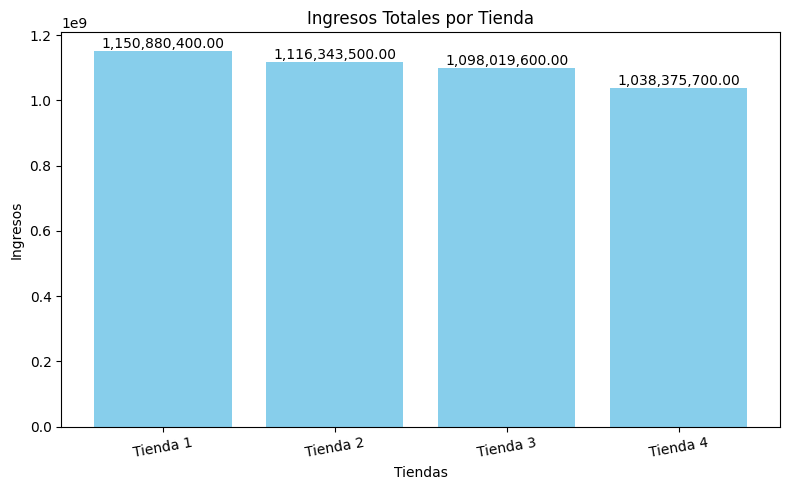

In [36]:
import pandas as pd

url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"
tienda = pd.read_csv(url1)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)


tiendas_data = [tienda, tienda2, tienda3, tienda4]
ingresos = []

for i, tienda_df in enumerate(tiendas_data, start=1):
    tienda_df["Ingreso"] = tienda_df["Precio"]
    ingreso_total = tienda_df["Ingreso"].sum()
    ingresos.append(ingreso_total)
    print(f'El ingreso total de la tienda {i} es: {ingreso_total:,.2f}')

nombres_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.bar(nombres_tiendas, ingresos, color='skyblue')
plt.title('Ingresos Totales por Tienda')
plt.xlabel('Tiendas')
plt.ylabel('Ingresos')
plt.xticks(rotation=10)
plt.tight_layout()

# Agregar etiquetas con los valores
for i, valor in enumerate(ingresos):
    plt.text(i, valor, f'{valor:,.2f}', ha='center', va='bottom')

plt.show()






# 2. Ventas por categoría

In [5]:
import pandas as pd

url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url1)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)


ventas_tienda = tienda.groupby("Categoría del Producto")["Precio"].sum().sort_values(ascending=False)
ventas_tienda2 = tienda2.groupby("Categoría del Producto")["Precio"].sum().sort_values(ascending=False)
ventas_tienda3 = tienda3.groupby("Categoría del Producto")["Precio"].sum().sort_values(ascending=False)
ventas_tienda4 = tienda4.groupby("Categoría del Producto")["Precio"].sum().sort_values(ascending=False)

ventas_formateadas = ventas_tienda.apply(lambda x: f"{x:,.2f}")
ventas_formateadas2 = ventas_tienda2.apply(lambda x: f"{x:,.2f}")
ventas_formateadas3 = ventas_tienda3.apply(lambda x: f"{x:,.2f}")
ventas_formateadas4 = ventas_tienda4.apply(lambda x: f"{x:,.2f}")

print("Ventas por categoría - Tienda 1:")
print(ventas_formateadas)
print("\nVentas por categoría - Tienda 2:")
print(ventas_formateadas2)
print("\nVentas por categoría - Tienda 3:")
print(ventas_formateadas3)
print("\nVentas por categoría - Tienda 4:")
print(ventas_formateadas4)


Ventas por categoría - Tienda 1:
Categoría del Producto
Electrónicos               429,493,500.00
Electrodomésticos          363,685,200.00
Muebles                    187,633,700.00
Instrumentos musicales      91,299,000.00
Deportes y diversión        39,290,000.00
Juguetes                    17,995,700.00
Artículos para el hogar     12,698,400.00
Libros                       8,784,900.00
Name: Precio, dtype: object

Ventas por categoría - Tienda 2:
Categoría del Producto
Electrónicos               410,831,100.00
Electrodomésticos          348,567,800.00
Muebles                    176,426,300.00
Instrumentos musicales     104,990,300.00
Deportes y diversión        34,744,500.00
Juguetes                    15,945,400.00
Artículos para el hogar     14,746,900.00
Libros                      10,091,200.00
Name: Precio, dtype: object

Ventas por categoría - Tienda 3:
Categoría del Producto
Electrónicos               410,775,800.00
Electrodomésticos          329,237,900.00
Muebles           

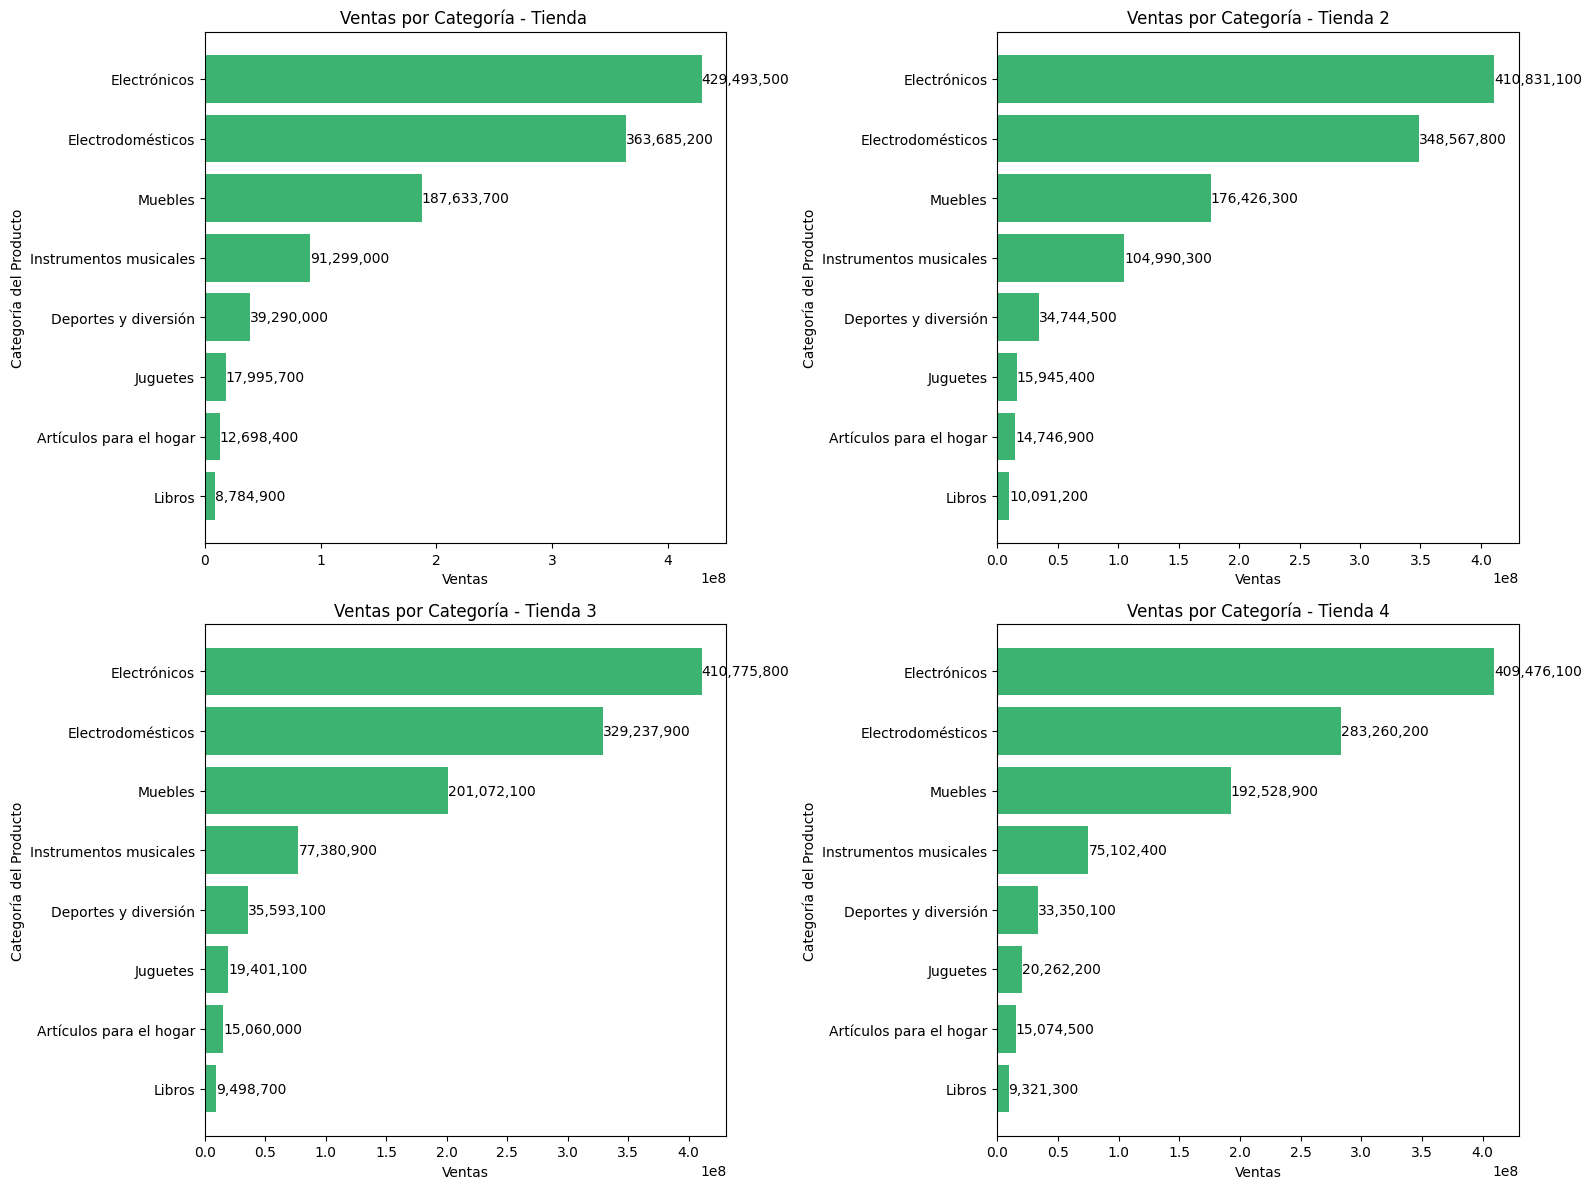

In [7]:
import matplotlib.pyplot as plt

# Lista de DataFrames de ventas por categoría
ventas_por_tienda = [ventas_tienda, ventas_tienda2, ventas_tienda3, ventas_tienda4]
nombres_tiendas = ['Tienda ', 'Tienda 2', 'Tienda 3', 'Tienda 4']

# Tamaño general de la figura
plt.figure(figsize=(16, 12))

# Generar un gráfico por tienda
for i, (ventas, nombre) in enumerate(zip(ventas_por_tienda, nombres_tiendas), start=1):
    plt.subplot(2, 2, i)  # Distribuir en 2 filas, 2 columnas
    plt.barh(ventas.index, ventas.values, color='mediumseagreen')
    plt.title(f'Ventas por Categoría - {nombre}')
    plt.xlabel('Ventas')
    plt.ylabel('Categoría del Producto')
    plt.gca().invert_yaxis()  # Para que la categoría más vendida quede arriba
    # Agregar valores al final de las barras
    for j, valor in enumerate(ventas.values):
        plt.text(valor, j, f'{valor:,.0f}', va='center')

plt.tight_layout()
plt.show()





# 3. Calificación promedio de la tienda


In [26]:
import pandas as pd

url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url1)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)


calificacion_media = tienda["Calificación"].mean()
calificacion_media2 = tienda2["Calificación"].mean()
calificacion_media3 = tienda3["Calificación"].mean()
calificacion_media4 = tienda4["Calificación"].mean()


print(f"La calificacion media de la tienda 1 es : {calificacion_media:.2f}")
print(f"La calificacion media de la tienda 2 es : {calificacion_media2:.2f}")
print(f"La calificacion media de la tienda 3 es : {calificacion_media3:.2f}")
print(f"La calificacion media de la tienda 4 es : {calificacion_media4:.2f}")




La calificacion media de la tienda 1 es : 3.98
La calificacion media de la tienda 2 es : 4.04
La calificacion media de la tienda 3 es : 4.05
La calificacion media de la tienda 4 es : 4.00


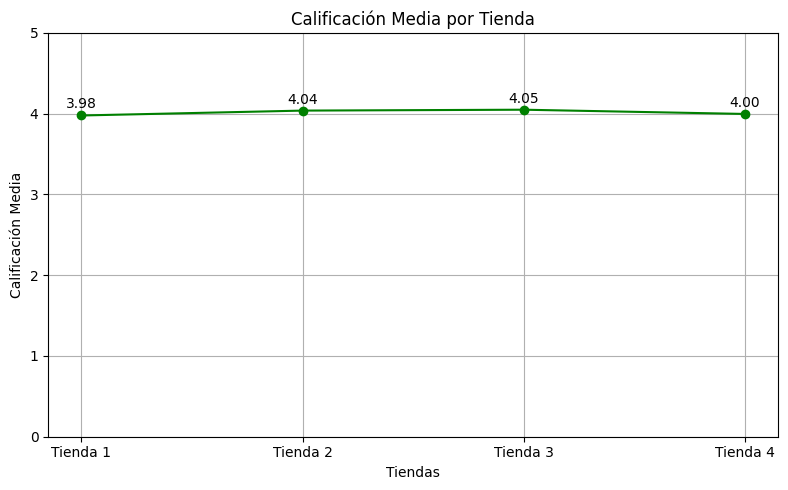

In [27]:
import matplotlib.pyplot as plt

# Lista con las calificaciones medias
calificaciones = [calificacion_media, calificacion_media2, calificacion_media3, calificacion_media4]
tiendas = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]

plt.figure(figsize=(8, 5))
plt.plot(tiendas, calificaciones, marker='o', linestyle='-', color='green')
plt.title("Calificación Media por Tienda")
plt.xlabel("Tiendas")
plt.ylabel("Calificación Media")
plt.ylim(0, 5)  # Calificaciones están entre 0 y 5
plt.grid(True)

# Mostrar los valores exactos en cada punto
for i, cal in enumerate(calificaciones):
    plt.text(i, cal + 0.05, f'{cal:.2f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


# 4. Productos más y menos vendidos

# 5. Envío promedio por tienda